# MEAN SHIFT CLUSTERING

In [1]:
import random
import math
import numpy as np

In [2]:
def euclidean_dist(x1,y1,x2,y2):
    if y1 is None and y2 is None:
        return math.sqrt((x1-x2)**2)
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

In [3]:
def get_neighbors_indexes(current_point_x,current_point_y , x,y,bandwidth):
    neighbors_indexes = []
    for i in range(len(x)):
            dist = euclidean_dist(current_point_x,current_point_y,x[i],y[i])
            if dist <= bandwidth:
                neighbors_indexes.append(i)
    return neighbors_indexes

In [4]:
def kernel(z_original , z_copy ,bandwidth,kernel_):
    if kernel_ == "flat":
        return 1
    elif kernel_ == "gaussian":
        return math.exp((-1*(euclidean_dist(z_original,None,z_copy,None)**2)) / (2*bandwidth**2) )

In [5]:
def get_new_centroid(indexes_in_region, current_point_x,current_point_y,x,y,bandwidth,kernel_):
    centriod_x = 0
    centriod_y = 0
    sum_kernels_x = 0
    sum_kernels_y = 0
    for i in range(len(x)):
        if i in indexes_in_region:
            kx = kernel(current_point_x,x[i],bandwidth,kernel_)
            ky = kernel(current_point_y,y[i],bandwidth,kernel_)
            centriod_x += x[i]*kx
            centriod_y += y[i]*ky
            sum_kernels_x += kx
            sum_kernels_y += ky
    return centriod_x/sum_kernels_x ,centriod_y/sum_kernels_y

In [6]:
def generate_labels(centeriods,bandwidth):
    labels = [-1] * len(centeriods)
    label = 0
    for i in range(len(centeriods)):
        if labels[i] == -1:
            labels[i] = label
        for j in range(i+1,len(centeriods)):
            if centeriods[i][0] == centeriods[j][0] and centeriods[i][1] == centeriods[j][1] and labels[j] == -1:
                labels[j] = label
        label += 1
    # before returning the labels we need to check if we have two centres that close enough to be considered as one
    for i in range(len(centeriods)):
        for j in range(i+1,len(centeriods)):
            dist = euclidean_dist(centeriods[i][0],centeriods[i][1],centeriods[j][0],centeriods[j][1])
            if dist <= bandwidth and dist != 0:
                labels[j] = labels[j]
                centeriods[j] = centeriods[i]
    return labels 

In [7]:
def MeanShift(x,y,bandwidth,max_iter,kernel_):
    centeriods=[]
    for i in range(len(x)):
        x_copy = x[i]
        y_copy = y[i]
        j = 0
        while j< max_iter:
            neighbors_indexes = get_neighbors_indexes(x_copy,y_copy,x,y,bandwidth)
            centeriod = get_new_centroid(neighbors_indexes,x_copy,y_copy,x,y,bandwidth,kernel_)
            if centeriod[0]== x_copy and centeriod[1] == y_copy:
                # converge
                break
            x_copy = centeriod[0]
            y_copy = centeriod[1]
            j += 1
        centeriods.append((x_copy,y_copy))
    labels_ = generate_labels(centeriods,bandwidth)
    print(f"labels : {labels_}")
    print(f"centers : {set(centeriods)}")
    plt.scatter(x,y,c=labels_)

In [8]:
x = [1, 5, 3, 10, 11, 8, 2]
y = [2,7,2,10,12,7,3]

In [9]:
import matplotlib.pyplot as plt

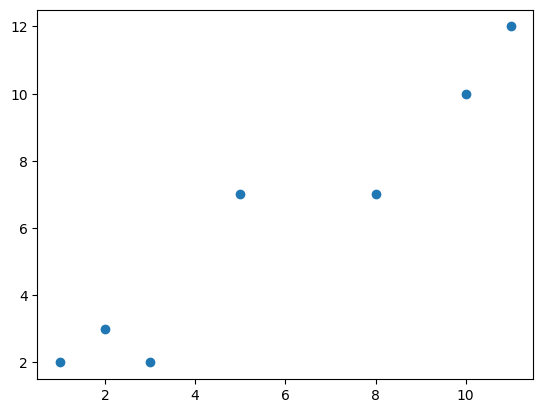

In [10]:
plt.scatter(x,y)

# flat kernel

labels : [0, 1, 0, 3, 3, 1, 0]
centers : {(6.5, 7.0), (10.5, 11.0), (2.0, 2.3333333333333335)}


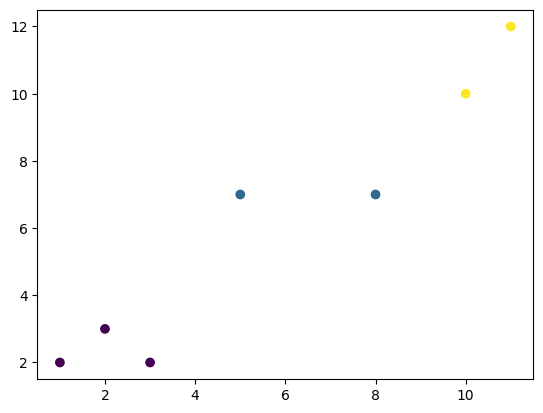

In [11]:
MeanShift(np.array(x) , np.array(y) , 3,100,kernel_="flat")

# gaussian kernel

labels : [0, 1, 0, 3, 4, 5, 0]
centers : {(2.0, 2.329127698386126), (10.5, 11.0), (6.499999999999998, 7.0)}


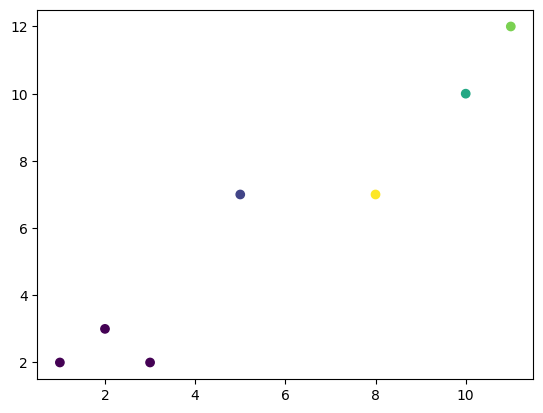

In [12]:
MeanShift(np.array(x) , np.array(y) , 3,100,kernel_="gaussian")